# Exploring Data Through Plotting

(based on Morgan Rehnberg's previous tutorial exercices. Adapted to use pandas by K.-Michael Aye)

Realizing that there’s more to the solar system than just the Sun, you have commandeered the Cassini spacecraft and performed a stellar occultation of the rings of Saturn. Stellar occultations work by watching a star pass behind a region of space and measuring how much the star dims. The more it dims, the denser the material in that region of space must be. Let's find a curious feature within the rings and make a plot of it.

To start on this task, create a new Jupyter notebook. 

Instead of fiddling with data file reading on your own, I highly recommend to use the very powerful CSV reader of `pandas`. It has many options to control its behavior, and will return a pandas.DataFrame for which you just have seen, how powerful it is.

Ok, so let's read some data in, but first copy the data-file from my home folder to the folder where you started the jupyter notebook (for simplicity).

In case you have started (or will start) the notebook from your home folder (that's the folder where you Terminal is, when you open it), that command would be ('cp' for 'copy'):

```bash
$ cp ../klay6683/alpleo.csv $HOME
```
Ok, now read it into a dataframe with pd.read_csv:

In [2]:
df = pd.read_csv("alpleo.csv")
df.head()

,data,et,lon,optical_depth,radius,rev,star_name
0,721.0,1.714756e+08,11.861636,1.230884,204588.403236,9,alpleo
1,664.0,1.714756e+08,11.860854,1.254440,204584.406186,9,alpleo
2,713.0,1.714756e+08,11.860072,1.232754,204580.409173,9,alpleo
3,690.0,1.714756e+08,11.859290,1.249550,204576.412182,9,alpleo
4,741.0,1.714756e+08,11.858508,1.227637,204572.415227,9,alpleo


I often use the head() method of dataframes to get a quick glance at data.

Maybe have a look at the overall stats to get a better feel for the data:

In [3]:
df.describe()

,data,et,lon,optical_depth,radius,rev
count,34727.000000,3.472700e+04,34727.000000,34727.000000,34727.000000,34727.0
mean,4021.899790,1.714791e+08,226.498677,1.099901,148052.430135,9.0
std,4150.364486,2.004967e+03,158.358875,0.289155,27859.303448,0.0
min,27.000000,1.714756e+08,0.003681,0.752383,114127.238886,9.0
25%,496.000000,1.714773e+08,9.259683,0.768340,121875.835022,9.0
50%,686.000000,1.714791e+08,328.259062,1.257333,142542.054196,9.0
75%,9116.500000,1.714808e+08,346.645106,1.333582,171326.312658,9.0
max,10016.000000,1.714825e+08,359.998585,1.512767,204588.403236,9.0


So we have 34727 rows! One can check that also with the `shape` of  the dataframe, a feature offered by the underlying numpy:

In [4]:
df.shape

(34727, 7)

Let's for now focus on two of these columns: `data` and `radius`:

In [5]:
subdf = df[['data', 'radius']]
subdf.head()

,data,radius
0,721.0,204588.403236
1,664.0,204584.406186
2,713.0,204580.409173
3,690.0,204576.412182
4,741.0,204572.415227


Let's create a preliminary plot of this, with data vs radius, so data on y-axis, radius on x-axis.

Use the built-in help system to find out how to use df.plot to do this: `df.plot?`

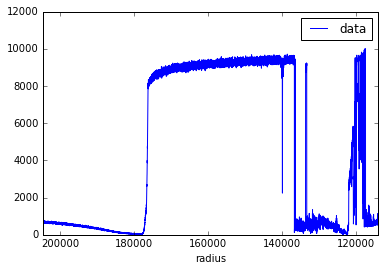

In [6]:
# activate the plotting backend first
%matplotlib inline  

subdf.plot('radius', 'data')

Note, the ring radius numbers are going down? That's because they were stored like that in the csv file. But because I will refer always to the Saturn ring radius, I decide to declare the radius to be my index of the dataframe. This will make things even easier for plotting and sorting:

In [7]:
subdf = subdf.set_index('radius')
subdf.head()

,data
radius,
204588.403236,721.0
204584.406186,664.0
204580.409173,713.0
204576.412182,690.0
204572.415227,741.0


Make sure you understanding the gravity of this! Instead of having just index numbers based on position, we have now actual physical values as index that directly relate to the data values!

This is a much more data-related way of working than by anonymous cold-hearted index positions. ;)

See how the column with pure counts is gone, as we have replaced the default index of just row numbers with the radius? But it's not sorted yet, so let's do that:

In [8]:
subdf = subdf.sort_index()
subdf.head()

,data
radius,
114127.238886,696.0
114127.239294,699.0
114127.239944,730.0
114127.240813,766.0
114127.241859,726.0


Now let's try that plot again:

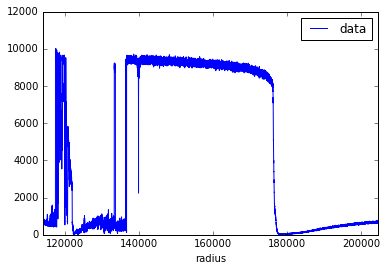

In [9]:
subdf.plot()

The cool thing is, that now I even don't need to provide what I want to plot, because I declared one of the columns to be the index, which automatically puts it on the x-axis, and the only other column becomes automatically the data for the y-axis of the plot.

Doesn’t look like much, eh? What you’re looking at is an observation of three regions of the rings: the Cassini Division, the A ring, and the F ring. Let’s take a closer look at the F ring, one of the most turbulent regions in the solar system. The F ring is centered around 140,000 km from Saturn.

> **TASK:** Plot the region between r = 138,000 km and r = 142,000 km in your data

> Remember how you can select dataframe data with the .loc function, for example: subdf.loc[1000:2000], or how just brackets are fine when just selecting on index values?
And the cool thing that we are now selecting on actual radius values, not their indices! 

So, create a plot for the F ring now. The result should look like this:

![first_plot](first_zoom.png "First zoom")

The dips near the center of the plot represent the core of the F ring. The large peak in the middle, however, is something different. Let’s make a plot of it.

> **TASK:** Plot the region [139400, 140500]

Result: ![second_plot](second_zoom.png "Second zoom")

Here's our strange feature, a clump of material known as a "kitten"!

The counts in this plot measure the amount of light that filters through the rings at any given point, but counts aren't linearly related to density.
As a proxy for density, astronomers often use optical depth. The data you unpacked from alpleo9.csv contained a column for optical depth. Check all columns quickly like so:

In [10]:
df.columns

Index(['data', 'et', 'lon', 'optical_depth', 'radius', 'rev', 'star_name'], dtype='object')

So, let's plot that `optical_depth` on top of the `data` column. For that we need to go back to the original dataframe and pick out that extra column for the `subdf`. Then we need to set that index there also to radius and sort by it:

> **TASK:** Redo the creation of subdf with also including the 'optical_depth' column. Set the index again to `radius` and sort by the radius values as before.

> **TASK:** Now plot the things again between the above used focused radius values. Maybe you want to store them into variables to not type those long numbers all over again. Maybe you even want to create another subdf that already is filtered for your region of radius interest? Up to you.

Result should look like this:
    ![invisible](invisible_OD.png "invisible OD")

Do you see two lines? If not, print out the first few elements of the data and optical depth to see how similar they are.

> **TASK:** Print out the first lines of the columns using the head() method

After we know that they are quite different in scale, we need to plot the data on two different axes to be able to compare it. Fortunately, also a breeze with pandas:

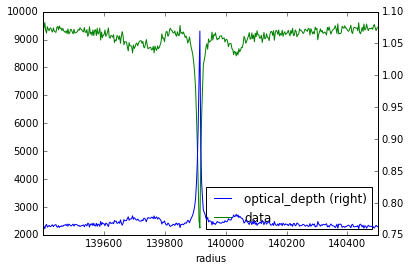

In [21]:
r1 = 139400
r2 = 140500
subdf[r1:r2].plot(secondary_y='optical_depth')

For a nice plot, we still miss a title and some y-axis labels. Also, maybe we want to adjust the plotting ranges.
For full control, it's often better to create the matplotlib axis (=a plotting window) yourself, provide it to pandas for a first plot, and then tweak it:

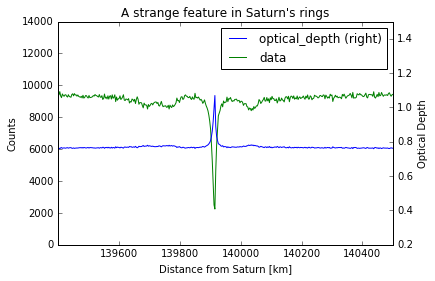

In [22]:
fig, ax = plt.subplots()  # powerful plt method, also able to create subplots, like 2x2 etc.
subdf[r1:r2].plot(ax=ax, secondary_y='optical_depth',
                  title="A strange feature in Saturn's rings",
                  ylim=(0, 14000))
ax.right_ax.set_ylim(0.2, 1.5)
ax.set_xlabel("Distance from Saturn [km]")
ax.right_ax.set_ylabel('Optical Depth')
ax.set_ylabel("Counts")

Now that we’ve studied the F ring through stellar occultations, let’s take a look at what it looks like in an image. 

> **TASK:** Find and copy the image N1530370686.png from my home folder to your jupyter notebook folder, like you did with the .csv file.

This image was captured by the Cassini Imaging Science System. We can read this image into Python by using matplotlib.image.imread().

> **TASK:** Read the image with the imread() function, display it with the imshow() function (check the `obvious` place for where the `imshow()` function could be).

Notice the thin line surrounding the main disk of the ring? That’s the F ring!

> IMPORTANT NOTE: the `%matplotlib inline` command activates an interactive plotting environment. If you want to plot in standard Python scripts that run non-interactively, you will need at the very end of your script the command `plt.show()` to start the GUI part of showing plots in extra windows.